Data dictionary loaded successfully.


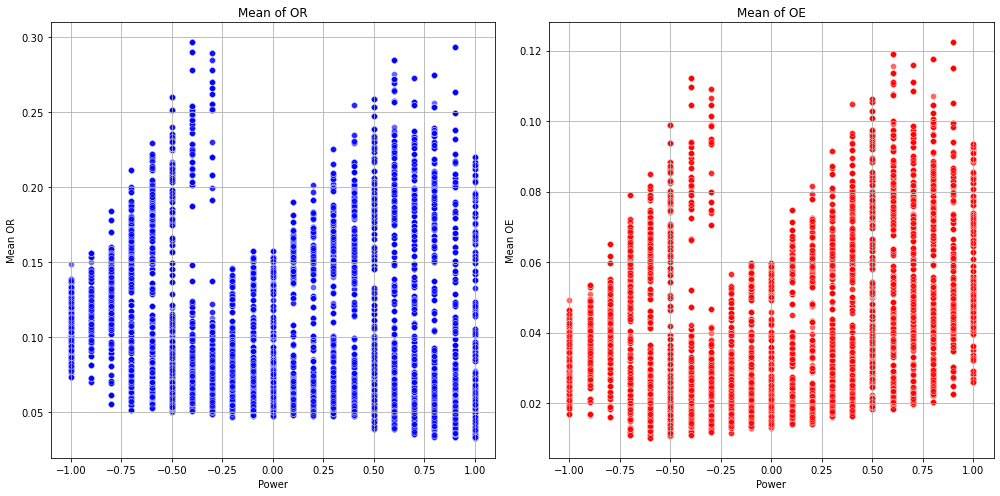

In [18]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import random

# Function to load the data dictionary from a pickle file
def load_data_dictionary(file_path):
    with open(file_path, 'rb') as f:
        data_dictionary = pickle.load(f)
    return data_dictionary

# Function to find the closest centroid and return mean(obs[::2]) and mean(obs[1::2])
def closest_centroid_means(value, data_dictionary):
    closest_centroid = min(data_dictionary.keys(), key=lambda c: np.abs(np.linalg.norm(np.array(c) - value)))
    observations = data_dictionary[closest_centroid]
    chosen_obs = random.choice(observations)
    return np.mean(chosen_obs[::2])/12000, np.mean(chosen_obs[1::2])/12000

# Load the data dictionary
data_dictionary = load_data_dictionary('data_dictionary.pkl')
print("Data dictionary loaded successfully.")

# Prepare data for plotting
values = np.arange(-1, 1.1, 0.1)
means_even = []
means_odd = []
powers = []

for val in values:
    for i in range(1000):
        mean_even, mean_odd = closest_centroid_means(val, data_dictionary)
        means_even.append(mean_even)
        means_odd.append(mean_odd)
        powers.append(val)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot for mean(obs[::2])
plt.subplot(1, 2, 1)
plt.scatter(powers, means_even, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Mean of OR')
plt.xlabel('Power')
plt.ylabel('Mean OR')
plt.grid(True)

# Plot for mean(obs[1::2])
plt.subplot(1, 2, 2)
plt.scatter(powers, means_odd, color='red', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Mean of OE')
plt.xlabel('Power')
plt.ylabel('Mean OE')
plt.grid(True)

plt.tight_layout()
plt.show()


In [3]:
closest_centroid_means(value=0.1, data_dictionary=data_dictionary)

(618.28, 183.812)

The power value which maximizes the reward is: -0.7000000000000001


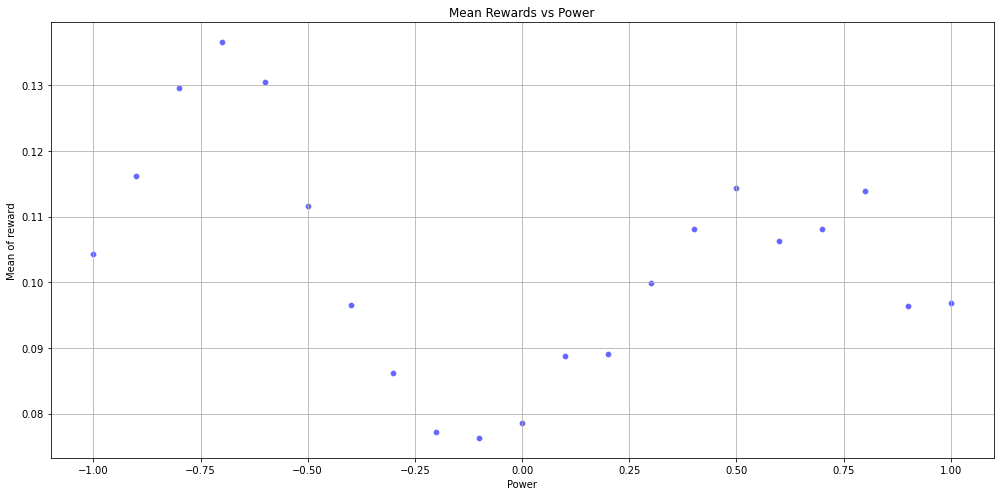

In [17]:
# Prepare data for plotting
values = np.arange(-1, 1.1, 0.1)
mean_rews = []
powers = []

for val in values:
    rews = []
    for i in range(1000):
        mean_even, mean_odd = closest_centroid_means(val, data_dictionary)
        rews.append(mean_even)
    mean_rews.append(np.mean(rews))
    powers.append(val)

# Find the power value which maximizes the mean reward
max_reward_index = np.argmax(mean_rews)
max_power = powers[max_reward_index]
print(f"The power value which maximizes the reward is: {max_power}")

# Plot the results
plt.figure(figsize=(14, 7))

# Plot 
plt.scatter(powers, mean_rews, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Mean Rewards vs Power')
plt.xlabel('Power')
plt.ylabel('Mean of reward')
plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
action

array([0.8891488], dtype=float32)